In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report


In [2]:
data = pd.read_csv('emotions.csv')

In [3]:
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


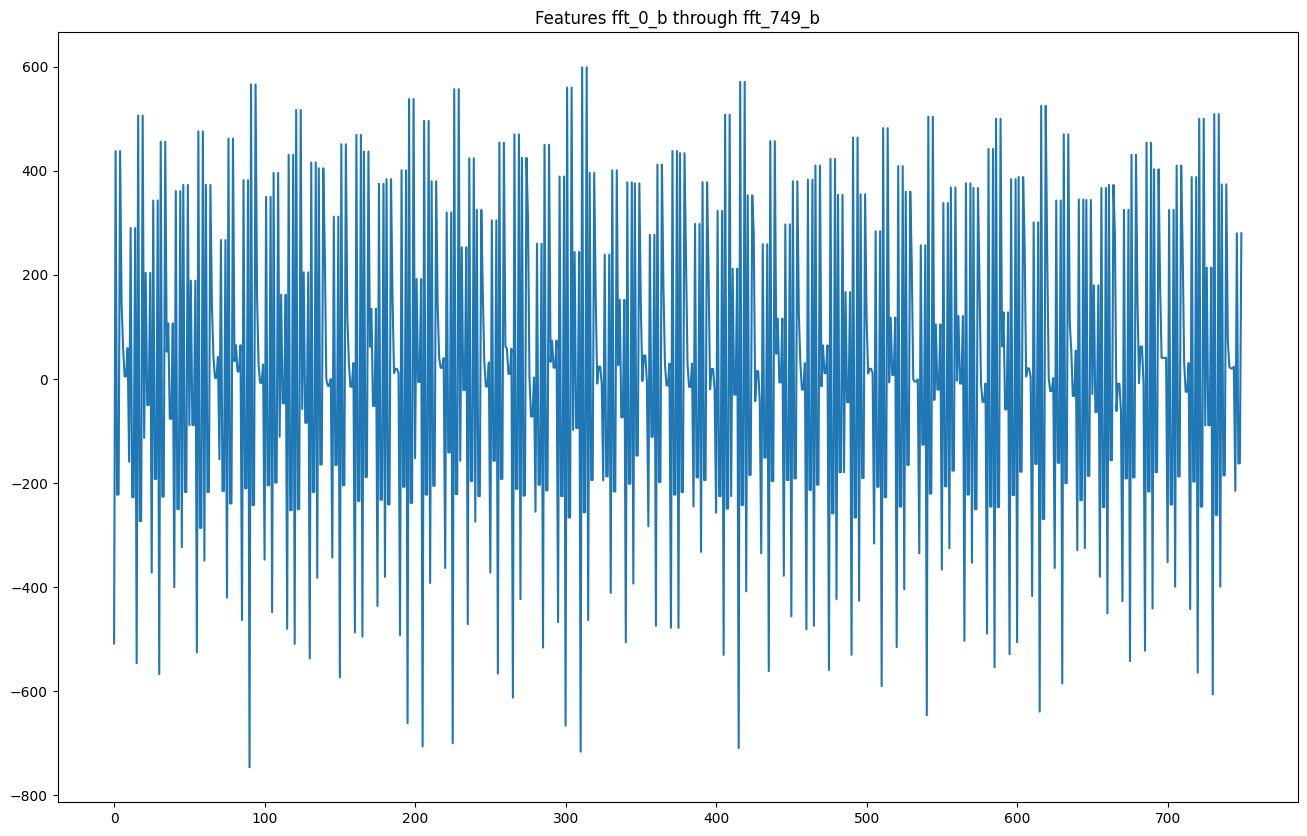

In [4]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(16, 10))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [5]:
data['label'].value_counts()
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [6]:
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)


C:\Users\shivs\AppData\Local\Temp\ipykernel_16020\1244103228.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace(label_mapping)


In [8]:
train, test = train_test_split(data, test_size=0.05)
X_train.shape

(1492, 2548)

In [9]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(2548,1)),
    tf.keras.layers.Dense(2000,activation='relu'),
    tf.keras.layers.Dense(1900,activation='relu'),
    tf.keras.layers.Dense(1800,activation='relu'),
    tf.keras.layers.Dense(1600,activation='softmax'),
    
])
print(model.summary())
# train

C:\Users\shivs\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 2548)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 2000)                │       5,098,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1900)                │       3,801,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1800)                │       3,421,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1600)                │       2,881,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,203,300 (58.00 MB)

 Trainable params: 15,203,300 (58.00 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
metrics=["accuracy"]
)

In [11]:
test.loc[test['label']=="NEGATIVE", 'label'] = 0
test.loc[test['label']=="POSITIVE", 'label'] = 2
test.loc[test['label']=="NETURAL", 'label'] = 1
train.loc[train['label']=="NEGATIVE", 'label'] = 0
train.loc[train['label']=="POSITIVE", 'label'] = 2
train.loc[train['label']=="NEUTRAL", 'label'] = 1
# y_train=train['label']
# x_train=train.drop(['label'],axis=1)
# train

In [12]:
X_train=train.drop(['label'],axis=1)
X_test=train.drop(['label'],axis=1)
y_train=train['label']
y_test=test['label']

In [13]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_train.shape
history=model.fit(X_train,y_train,batch_size=64,epochs=180)

Epoch 1/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.4081 - loss: 115114711711744.0000
Epoch 2/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.4609 - loss: 44506174980096.0000
Epoch 3/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.5086 - loss: 86305547485184.0000
Epoch 4/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.5539 - loss: 42182304071680.0000
Epoch 5/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.4925 - loss: 70290239389696.0000
Epoch 6/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.6586 - loss: 73267251511296.0000
Epoch 7/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.5073 - loss: 51051893882880.0000
Epoch 8/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.5594 - loss: 50297208569856.0000
Epoch 9/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.5411 - loss: 35350869180416.0000
Epoch 10/180
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.4366 - loss: 66737441603584.0000
Epoch 11

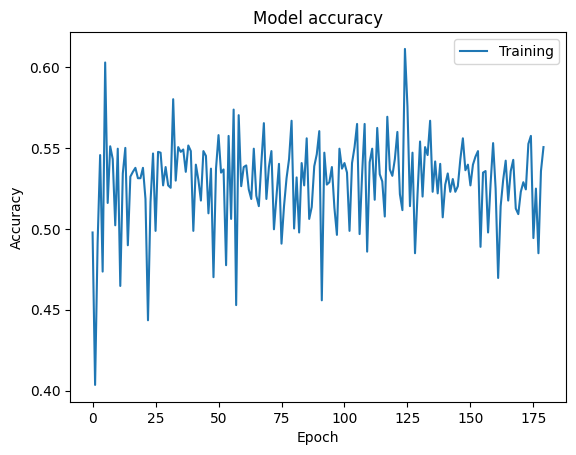

In [14]:
plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training"])
plt.show()

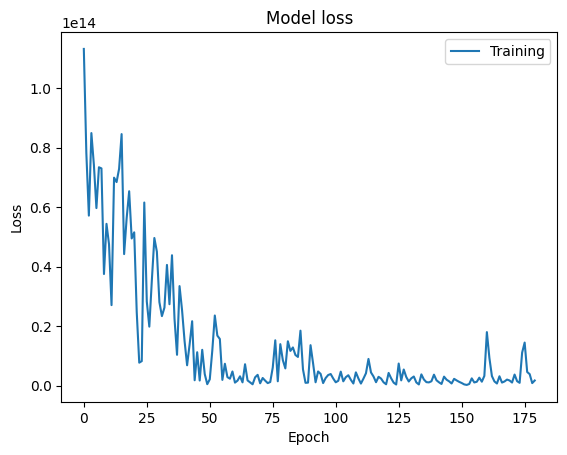

In [15]:
plt.plot(history.history['loss'])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training"])
plt.show()

In [16]:
X_test = np.asarray(X_train).astype('float32')
y_test = np.asarray(y_train).astype('float32')


In [17]:
rnn_model=tf.keras.Sequential()
rnn_model.add(tf.keras.Input(shape=(2548,1)))
rnn_model.add(tf.keras.layers.SimpleRNN(15,return_sequences=True,activation='relu',input_shape=(15,1)))
rnn_model.add(tf.keras.layers.SimpleRNN(12,return_sequences=False,activation='relu',input_shape=(15,1)))
rnn_model.add(tf.keras.layers.Dense(13,activation=tf.nn.relu))
rnn_model.add(tf.keras.layers.Dense(10,activation=tf.nn.relu))
rnn_model.add(tf.keras.layers.Dense(16,activation=tf.nn.softmax))
print(rnn_model.summary())

C:\Users\shivs\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 2548, 15)            │             255 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 12)                  │             336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 13)                  │             169 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             176 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,076 (4.20 KB)

 Trainable params: 1,076 (4.20 KB)

 Non-trainable params: 0 (0.00 B)

None


In [18]:
rnn_model.compile(
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
metrics=["accuracy"]
)

In [23]:
history_rnn=rnn_model.fit(X_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.1307 - loss: 155.1353
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2059 - loss: 125.6305
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.2107 - loss: 102.1486
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1922 - loss: 83.9202
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1866 - loss: 71.6852
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1517 - loss: 66.0475
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1442 - loss: 57.2745
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.1521 - loss: 50.4251
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1318 - loss: 48.0966
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1365 - loss: 45.2068
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.1448 - loss: 38.9722
Epoch 12/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accurac

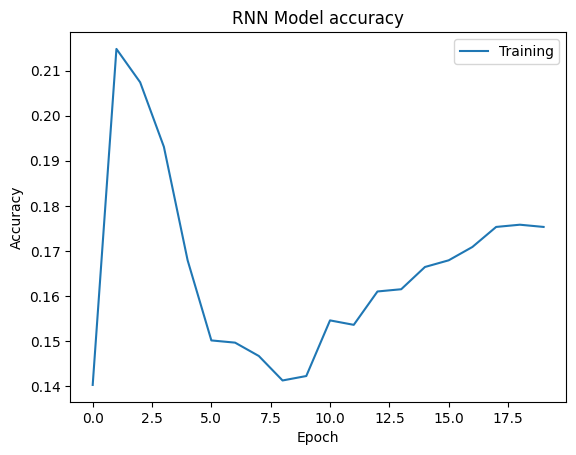

In [25]:
plt.plot(history_rnn.history['accuracy'])
plt.title("RNN Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training"])
plt.show()


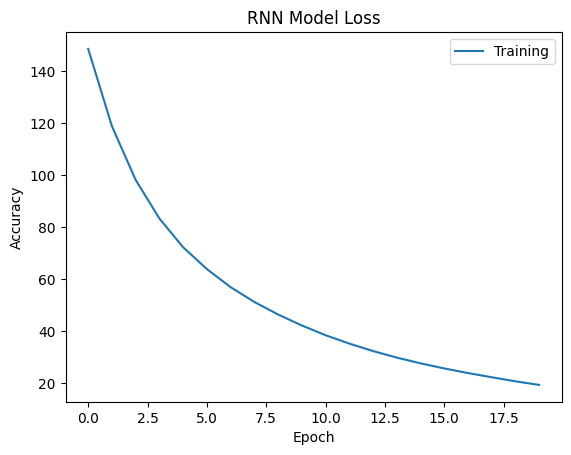

In [26]:
plt.plot(history_rnn.history['loss'])
plt.title("RNN Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training"])
plt.show()

In [27]:
rnn_model.evaluate(X_test,y_test,batch_size=64)

32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 350ms/step - accuracy: 0.1767 - loss: 17.8951


[18.510610580444336, 0.1743209809064865]